In [3]:
# Importing necessary libraries
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the Pima Indians Diabetes dataset
dataframe = pd.read_csv('/content/drive/MyDrive/AIML_datasets/pima-indians-diabetes.csv', delimiter=',')

# Split into input (X) and output (y) variables
X = dataframe.iloc[:, :8]  # Features
y = dataframe.iloc[:, 8]   # Target

# Check the shape of the dataframe
dataframe.shape

(767, 9)

In [5]:
# Split the dataset into training and test sets
features_train, features_test, target_train, target_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [6]:
# Define the Keras model
network = models.Sequential()

# Add hidden layer with ReLU activation
network.add(Dense(units=8, activation="relu", input_shape=(features_train.shape[1],)))

# Add another hidden layer with ReLU activation
network.add(Dense(units=8, activation="relu"))

# Output layer with Sigmoid activation for binary classification
network.add(Dense(units=1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the Keras model using binary crossentropy loss and Adam optimizer
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Train the model on the training data
history = network.fit(features_train, target_train, epochs=20, verbose=1, batch_size=100, validation_data=(features_test, target_test))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6231 - loss: 30.4695 - val_accuracy: 0.6929 - val_loss: 24.4928
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6369 - loss: 26.9676 - val_accuracy: 0.6929 - val_loss: 21.4563
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6284 - loss: 24.1589 - val_accuracy: 0.6929 - val_loss: 18.6094
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6094 - loss: 22.3963 - val_accuracy: 0.6929 - val_loss: 16.0734
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6379 - loss: 18.0768 - val_accuracy: 0.6929 - val_loss: 14.0700
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6329 - loss: 15.9872 - val_accuracy: 0.6929 - val_loss: 12.1644
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6175 - loss: 14.3447 - val_accuracy: 0.6929 - val_loss: 10.3028
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6371 - loss: 11.3624 - val_accuracy: 0.6929 - val_l

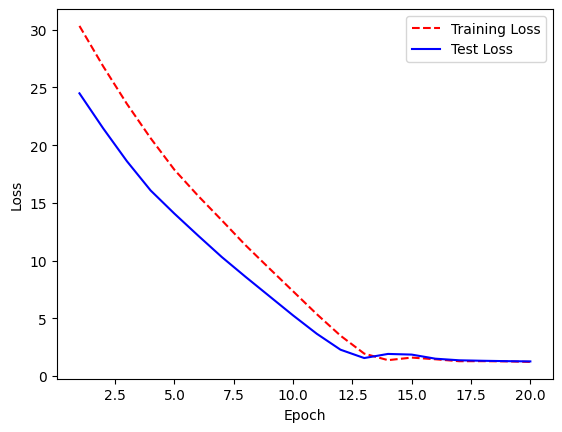

In [9]:
# Plot training and validation loss
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [10]:
# Evaluate the model on the training data
_, accuracy = network.evaluate(features_train, target_train)
print('Training Accuracy: %.2f' % (accuracy * 100))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5867 - loss: 1.2471 
Training Accuracy: 58.28


In [11]:
# Predict using the trained Keras model
predicted_target = network.predict(features_test)

# Display predictions for 10 samples
for i in range(10):
    print(predicted_target[i])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[0.5489292]
[0.9584958]
[0.3952365]
[1.8417792e-05]
[0.42771295]
[0.10228183]
[0.26017004]
[8.490159e-05]
[0.6487505]
[0.3684874]


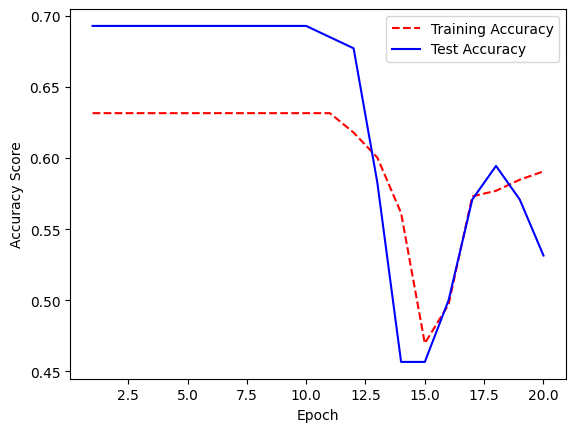

In [12]:
# Plot training and validation accuracy
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()